### KMeans Clustering for fifa players segregation 

### Import packages

In [1]:
import pandas as pd
import numpy as np 

In [3]:
players=pd.read_csv("../Data/players_22.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_29840\3598269685.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players=pd.read_csv("../Data/players_22.csv")


In [5]:
players.head(n=3)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [7]:
players.columns.to_list()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [10]:
features=["overall","potential","wage_eur","value_eur","age"]

In [11]:
players=players.dropna(subset=features)

In [12]:
data=players[features].copy()

In [13]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


#### 1. Scale the data 
#### 2. Initialize random centroids 
#### 3. Label each data point 
#### 4. update centroids 
#### 5. Repeat steps 3 and 4 until centroids stop changing 

In [14]:
#1.Scale the data 
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


In [15]:
manual_data=((data-data.min()) /(data.max() - data.min())) * 9 + 1

In [23]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'data' is your original pandas DataFrame
scaler = StandardScaler()

# fit_transform returns a NumPy array
machine_data = scaler.fit_transform(data)

# Convert back to DataFrame if needed
machine_data_df = pd.DataFrame(machine_data, columns=data.columns)

# Now you can use .head()
print(machine_data_df.head())

    overall  potential   wage_eur  value_eur       age
0  3.957766   3.600787  15.967668   9.870564  1.863600
1  3.812472   3.436517  13.400340  15.321406  1.440533
2  3.667179   3.272248  13.400340   5.536158  2.286666
3  3.667179   3.272248  13.400340  16.569190  0.805934
4  3.667179   3.272248  17.508066  16.109480  1.017467


In [17]:
manual_data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [24]:
machine_data_df.describe()


,overall,potential,wage_eur,value_eur,age
count,1.916500e+04,1.916500e+04,1.916500e+04,19165.000000,1.916500e+04
mean,6.643843e-16,-9.491205e-17,4.745602e-17,0.000000,-3.321922e-16
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026,1.000026e+00
min,-2.725732e+00,-3.627066e+00,-4.375612e-01,-0.373212,-1.943997e+00
25%,-6.916240e-01,-6.702174e-01,-4.118879e-01,-0.312005,-8.863310e-01
50%,3.484313e-02,-1.313984e-02,-3.091948e-01,-0.246332,-4.019847e-02
75%,6.160168e-01,6.439377e-01,-5.246192e-02,-0.111703,8.059341e-01
max,3.957766e+00,3.929325e+00,1.750807e+01,25.106655,3.767398e+00


In [28]:
centroid =manual_data.apply(lambda x:float(x.sample()))
centroid

C:\Users\user\AppData\Local\Temp\ipykernel_29840\825601948.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid =manual_data.apply(lambda x:float(x.sample()))


overall      4.326087
potential    7.847826
wage_eur     1.218884
value_eur    1.059895
age          4.666667
dtype: float64

#### Initialized random centroids

In [30]:
def random_centroids(the_data,k):
    centroids=[]
    for i in range(k):
        centroid = the_data.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [32]:
centroids =random_centroids(manual_data,5)
centroids

C:\Users\user\AppData\Local\Temp\ipykernel_29840\3492356890.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = the_data.apply(lambda x : float(x.sample()))


,0,1,2,3,4
overall,7.065217,5.108696,2.565217,3.347826,5.304348
potential,7.652174,4.717391,4.130435,6.282609,6.282609
wage_eur,1.000000,1.862661,1.038627,1.002575,1.003863
value_eur,1.014660,1.055255,1.014660,1.055255,1.997051
age,4.666667,2.666667,2.666667,3.333333,6.666667


#### Label each data points

In [35]:
def get_labels(data,centroids):
    distances = centroids.apply(lambda x:np.sqrt(((manual_data -x ) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [37]:
labels=get_labels(manual_data,centroids)
labels

0        0
1        0
2        0
3        0
4        0
        ..
19234    2
19235    2
19236    2
19237    2
19238    2
Length: 19165, dtype: int64

In [38]:
labels.value_counts()

4    4488
1    4474
2    3873
3    3763
0    2567
Name: count, dtype: int64

In [43]:
manual_data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean()))


,overall,potential,wage_eur,value_eur,age
0,6.673569,6.988119,1.775152,1.547481,4.043175
1,4.837783,5.074784,1.119417,1.064539,3.888897
2,2.820115,4.048354,1.019636,1.014200,2.927038
3,4.054768,6.046673,1.059100,1.056572,2.452854
4,5.222403,4.840122,1.177806,1.060968,6.113522


In [44]:
def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from IPython.display import clear_output

In [ ]:
'''

def plot_clusters(manual_data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d =pca.fit_transform(manual_data)
    centroids_2d=pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data[:,0],y=data_2d[:,1],c=labels)
    plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
    plt.show()
    '''


InvalidIndexError: (slice(None, None, None), 0)

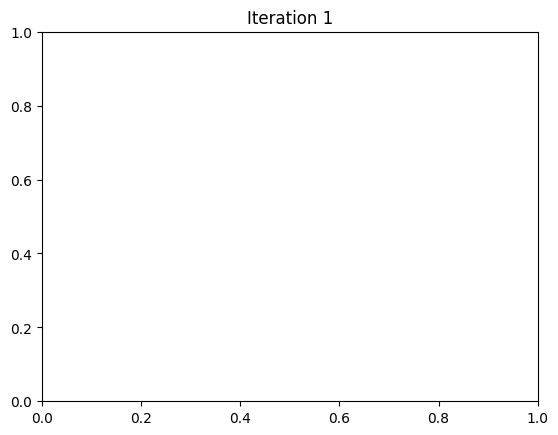

In [54]:
max_iterations =100
k=3

centroids =random_centroids(manual_data,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids =centroids

    labels= get_labels(manual_data,centroids)
    centroids=new_centroids(manual_data,labels,k)
    plot_clusters(manual_data,labels,centroids,iteration)
    iteration +=1